In [1]:
import matplotlib.pyplot as p
import matplotlib

def align_yaxis(ax1, v1, ax2, v2, y2min, y2max):
    """ adjust ax2 ylimit so that v2 in
        ax2 is aligned to v1 in ax1.

        where y2max is the maximum value in your secondary plot. I haven't
        had a problem with minimum values being cut, so haven't set this. This
        approach doesn't necessarily make for axis limits at nice near units,
        but does optimist plot space """
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1 - y2))
    miny, maxy = ax2.get_ylim()
    
    scale = 1.
    while scale * (maxy + dy) < y2max * 1.02:
        scale += 0.07
    
    ax2.set_ylim(scale * (miny + dy), scale * (maxy + dy))

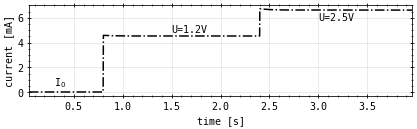

In [16]:
# calib timeline plot
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

import numpy as np
import matplotlib.pyplot as p

import json
import request

import webapi_access as api
from matplotlib.pyplot import cm

base = 'http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7XAnalysis/'
URL = 'QSB_Bolometry/BoloCalibMeasFoilCurrent_DATASTREAM/'
refURL = 'QSB_Bolometry/BoloCalibRefFoilCurrent_DATASTREAM/'

program = '20180719.010'

# xp info
program_info, req = api.xpid_info(program=program)
start = str(program_info['programs'][0]['from'])
stop = str(program_info['programs'][0]['upto'])

# triggers
t0 = program_info['programs'][0]['trigger']['1'][0]  # in ns
t4 = program_info['programs'][0]['trigger']['4'][0]  # in ns

obj = api.download_single(
    base + URL,
    program_info=program_info,
    start_POSIX=start, stop_POSIX=stop)

refobj = api.download_single(
    base + refURL,
    program_info=program_info,
    start_POSIX=start, stop_POSIX=stop)

time = [(t - obj['dimensions'][0]) / 1.e9 for t in obj['dimensions']]

t1, t2 = 2000, 2400
# t1, t2 = 0, -1
t3, t4 = 6000, 6400

cs = cm.Greys(np.linspace(1., .5, 2))
# fig, ax = p.subplots(1, 2)  # sharey=True)

# for ch in [1]:  # range(32):
#     l, = ax[0].plot(
#         time[t1:t2],
#         [x * 1.e3 for x in obj['values'][ch][t1:t2]],
#         c=cs[0], label='measurement')
#     refl, = ax[0].plot(
#         time[t1:t2],
#         [x * 1.e3 for x in refobj['values'][ch][t1:t2]],
#         c=cs[1], ls='-.', label='reference')
#     ax[0].legend(
#         [l, refl],
#         [l.get_label(), refl.get_label()])

#     l, = ax[1].plot(
#         time[t3:t4],
#         [x * 1.e3 for x in obj['values'][ch][t3:t4]],
#         c=cs[0], label='measurement')
#     refl, = ax[1].plot(
#         time[t3:t4],
#         [x * 1.e3 for x in refobj['values'][ch][t3:t4]],
#         c=cs[1], ls='-.', label='reference')
#     ax[1].legend(
#         [l, refl],
#         [l.get_label(), refl.get_label()])

# ax[0].set_ylim(4.55, 4.62)
# ax[1].set_ylim(6.65, 6.76)

# for axis in ax:
#     axis.set_ylabel('current [mA]')
#     axis.set_xlabel('time [s]')

# fig.set_size_inches(8., 2.)
# fig.savefig(loc + 'heating_ohmic_example_ch0.pdf', dpi=169.)

fig, ax = p.subplots(1, 1)  # sharey=True)
ch, t1, t2 = 1, 100, -100
l, = ax.plot(
    time[t1:t2],
    [x * 1.e3 for x in obj['values'][ch][t1:t2]],
    c=cs[0], lw=1.5, ls='-.')

ax.set_xlim(time[t1], time[t2])
ax.set_ylabel('current [mA]')
ax.set_xlabel('time [s]')

ax.text(0.3, .5, 'I$_{0}$')
ax.text(1.5, 4.8, 'U=1.2V')
ax.text(3., 5.8, 'U=2.5V')

fig.set_size_inches(6., 2.)
fig.savefig(loc + 'heating_ohmic_example_full.pdf', dpi=169.)

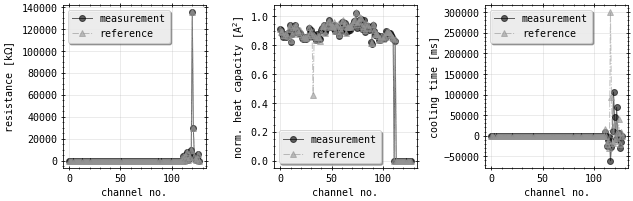

In [1]:
# calibs example plot
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

import numpy as np
import matplotlib.pyplot as p

import json
import request

import webapi_access as api
from matplotlib.pyplot import cm

import mClass

base = 'http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7XAnalysis/'
URL = ['QSB_Bolometry/M' + s + '_DATASTREAM/' for s in ['Res', 'Kappa', 'Tau']]
refURL = ['QSB_Bolometry/R' + s + '_DATASTREAM/' for s in ['Res', 'Kappa', 'Tau']]

program = '20180719.010'

# xp info
program_info, req = api.xpid_info(program=program)
start = str(program_info['programs'][0]['from'])
stop = str(program_info['programs'][0]['upto'])

# triggers
t0 = program_info['programs'][0]['trigger']['1'][0]  # in ns
t4 = program_info['programs'][0]['trigger']['4'][0]  # in ns

obj, refobj = [], []

for U in URL:
    obj.append(np.array(api.download_single(
        base + U, program_info=program_info,
        start_POSIX=start, stop_POSIX=stop)['values']))

for U in refURL:
    refobj.append(np.array(api.download_single(
        base + U, program_info=program_info,
        start_POSIX=start, stop_POSIX=stop)['values']))

for j, ch in enumerate(
        [4, 20, 87, 99]):
    for i in range(3):
        obj[i][0, ch] = np.nan
        refobj[i][0, ch] = np.nan

cs = cm.Greys(np.linspace(1., .5, 2))
fig, ax = p.subplots(1, 3)  # sharey=True)
fig.set_size_inches(9., 3.)

f = [1.e-3, 1.e3, 1.e3]

for i, stat in enumerate(obj):
    l, = ax[i].plot(
        stat[0] * f[i],
        c=cs[0], alpha=0.6, marker='o', label='measurement')
    refl, = ax[i].plot(
        refobj[i][0] * f[i],
        c=cs[1], alpha=0.6, ls='-.', marker='^', label='reference')

    # ax[i].set_xlim(0.0, 109)

# ax[0].set_ylim(0.800, 1.055)
# ax[1].set_ylim(.4, 1.1)
# ax[2].set_ylim(102.5, 125.)

ax[0].set_ylabel('resistance [k$\Omega$]')
ax[1].set_ylabel('norm. heat capacity [A$^{2}$]')
ax[2].set_ylabel('cooling time [ms]')

for axis in ax:
    axis.legend([l, refl], [l.get_label(), refl.get_label()])
    axis.set_xlabel('channel no.')

fig.savefig(loc + 'calibs_example.pdf', dpi=169.)

In [ ]:
# detector response example
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

import numpy as np
import matplotlib.pyplot as p

N = 1000
t1, t2 = 75, 500

time = np.linspace(0., 1., N)
tau = 0.08

radiation = np.zeros((N))
dU = np.zeros((N))
dUdt = np.zeros((N))

radiation[t1:t2] = 1.  # here comes the power

dU[t1:t2] = (1. - np.exp(-1.0 * time[:t2 - t1] / tau))
dU[t2:] = np.exp(-1. * time[:N - t2] / tau)

dUdt[t1:t2] = np.gradient(dU[t1:t2], time[1] - time[0])
dUdt[t2:] = np.gradient(dU[t2:], time[1] - time[0])

fig, ax = p.subplots(1, 3)
fig.set_size_inches(9., 3.)

ax[0].plot(
    time, radiation / np.max(radiation),
    c='k', label='power')

ax[1].plot(
    time, dU / np.max(dU),
    c='k', label='dU')
ax[1].plot(
    time, dUdt / np.max(dUdt),
    c='darkgrey', ls='-.', label='$\partial$U/$\partial$t')

ax[2].plot(
    time, dU / np.max(dU) + dUdt / np.max(dUdt),
    c='k', label='dU/$\\tau$ + $\partial$U/$\partial$t')

for axis in ax:
    axis.legend()
    axis.set_xlim(0.0, 1.0)
    
    axis.set_ylabel('norm [a.u.]')
    axis.set_xlabel('time [a.u.]')

fig.savefig(loc + 'signal_example_response.pdf', dpi=169.)

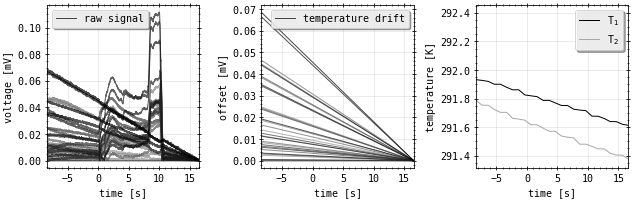

In [16]:
# calibs example plot
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

import numpy as np
import matplotlib.pyplot as p

import json
import request

import webapi_access as api
from matplotlib.pyplot import cm

import mClass

from scipy.optimize import curve_fit

base0 = 'http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7X/'
base = 'http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7XAnalysis/'
URL = 'QSB_Bolometry/BoloSignal_DATASTREAM/'
tempURL = ['QSB_Bolometry/TemperatureChannel' + s + '_DATASTREAM/V2/' for s in ['1', '2', '3', '4']]

program = '20180927.037'
# program = '20180927.38'
# program = '20180801.027'

# xp info
program_info, req = api.xpid_info(program=program)
start = str(program_info['programs'][0]['from'])
stop = str(program_info['programs'][0]['upto'])

# triggers
t0 = program_info['programs'][0]['trigger']['1'][0]  # in ns
t4 = program_info['programs'][0]['trigger']['4'][0]  # in ns

tempobj = []

foo = api.download_single(
    base0 + URL, program_info=program_info,
    start_POSIX=start, stop_POSIX=stop)
obj = np.array([
    np.array([(x - t0) / 1.e9 for x in foo['dimensions']]),
    np.array(foo['values'])])

for U in tempURL:
    foo = api.download_single(
        base + U, program_info=program_info,
        start_POSIX=start, stop_POSIX=stop)
    tempobj.append(np.array([
         np.array([(x - t0) / 1.e9 for x in foo['dimensions']]),
         np.array(foo['values'])]))

def lin_func(x,a,b):
    return (a * x + b)

T = np.where(obj[0] > 1.)[0].min()
corrected = np.zeros((obj[1].shape))
drifts = np.zeros((obj[1].shape))

old = obj[1].copy()
subst = np.zeros((obj[1].shape))

for ch in range(128):
    corr_sig = np.linspace(
        np.mean(obj[1][ch, :50]),
        np.mean(obj[1][ch, -50:]),
        np.shape(obj[0])[0])

    fit_results, tmp = curve_fit(
        lin_func, obj[0], corr_sig,
        p0=(1., .0))

    subst[ch] = obj[1][ch] - fit_results[0] * obj[0] + fit_results[1]
    corrected[ch] = np.abs(subst[ch] - np.mean(subst[ch, -50:]))

    drifts[ch] = np.abs(old[ch] - subst[ch]  - np.mean((old[ch] - subst[ch])[-50:]))
    cs = cm.Greys(np.linspace(.5, 1., 32))

fig, ax = p.subplots(1, 3)
fig.set_size_inches(9., 3.)

for ch in range(32):
    l, = ax[0].plot(
        obj[0],
        np.abs(obj[1][ch] - np.mean(obj[1][ch][-50:])) * 1.e3,
        c=cs[ch], alpha=0.7, label='raw signal')

    dl, = ax[1].plot(
        obj[0],
        drifts[ch] * 1.e3,  #  - np.mean(drifts[ch][-50:]),
        c=cs[ch], alpha=0.7, label='temperature drift')

ax[2].plot(
    tempobj[0][0],
    tempobj[0][1][0] + 273.15,
    c='k', label='T$_{1}$')
ax[2].plot(
    tempobj[1][0],
    tempobj[1][1][0] + 273.15,
    c='darkgrey', label='T$_{2}$')

for axis in ax:
    axis.set_xlim(obj[0].min(), obj[0].max())
    axis.set_xlabel('time [s]')
ax[0].legend([l], [l.get_label()])
ax[1].legend([dl], [dl.get_label()])
ax[2].legend()

ax[0].set_ylabel('voltage [mV]')
ax[1].set_ylabel('offset [mV]')
ax[2].set_ylabel('temperature [K]')

fig.savefig(loc + 'temp_drift_example.pdf', dpi=169.)

In [95]:
def freq_QSB(
        SF_decimal=None,
        SF_hex=None,
        f_in=None,
        s_in=None,
        chopmode=True,
        f_master=5.e6):  # Hz

    if (SF_hex is not None) or (SF_decimal is not None):
        if SF_decimal.__class__ == str:
            SF_decimal = int(SF_decimal, 16)
        if SF_decimal.__class__ == float:
            SF_decimal = int(SF_decimal)

        # if hex or decimal is given to calculate f/s
        if (SF_hex is not None) and (SF_decimal is None):
            SF_decimal = int(str(SF_hex), 16)
            SF_hex = str(SF_hex)

        elif (SF_hex is None) and (SF_decimal is not None):
            SF_hex = hex(SF_decimal)

        print('>> hex:', SF_hex,
              ', decimal:', SF_decimal,
              ', chopmode:', chopmode)

        if not chopmode:
            f_in = (f_master) / 16 * 1 / (SF_decimal)
        elif chopmode:
            f_in = (f_master) / 16 * 1 / (3 * SF_decimal)
        s_in = 1. / f_in
        print('>> f_in [kHz]:', f_in / 1000.,
              ', s_in [ms]:', s_in * 1000.)

    elif (f_in is not None) or (s_in is not None):
        # if f or s is given, calculate decimal/hex
        if (f_in is None) and (s_in is not None):
            f_in = 1. / float(s_in)
            s_in = 1. / float(f_in)

        elif (f_in is not None) and (s_in is None):
            s_in = 1. / float(f_in)
            f_in = 1. / float(s_in)

        print('>> f_in [kHz]:', f_in / 1000.,
              ', s_in [ms]:', s_in * 1000.,
              ', chopmode:', chopmode)

        if not chopmode:
            SF_decimal = 1. / ((16. * f_in) / f_master)
        elif chopmode:
            SF_decimal = 1. / (3. * (16. * f_in) / f_master)
        SF_hex = hex(int(SF_decimal))

        print('>> hex:', SF_hex,
              ', decimal:', SF_decimal)

    else:
        print('>> given nothing')

    return (f_in, s_in, SF_decimal, SF_hex)

f, s, d, h = freq_QSB(SF_decimal=2**12-1, chopmode=True)
f, s, d, h = freq_QSB(SF_decimal=1, chopmode=True)

>> hex: 0xfff , decimal: 4095 , chopmode: True
>> f_in [kHz]: 0.02543752543752544 , s_in [ms]: 39.312
>> hex: 0x1 , decimal: 1 , chopmode: True
>> f_in [kHz]: 104.16666666666667 , s_in [ms]: 0.0096


In [101]:
(39.312 - 0.0096) / 2**12

0.0095953125

In [15]:
# gas test plot
import numpy as np
import matplotlib.pyplot as p

import json
import request

import webapi_access as api
from matplotlib.pyplot import cm

import mClass

base = 'http://archive-webapi.ipp-hgw.mpg.de/Test/raw/W7XAnalysis/'
URL = 'QSB_Bolometry/BoloSignal_DATASTREAM/'

P = ['20181002.003', '20181010.001', '20180816.006',
     '20180920.052', '20180816.002']
for program in P:   
    # xp info
    program_info, req = api.xpid_info(program=program)
    start = str(program_info['programs'][0]['from'])
    stop = str(program_info['programs'][0]['upto'])

    obj = api.download_single(
        base + URL, program_info=program_info,
        start_POSIX=start, stop_POSIX=stop)

>> result: 0.08260882454537301 [nOhm/K]


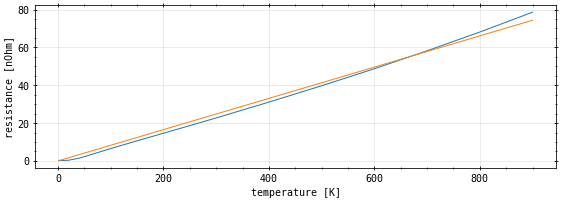

In [5]:
# resistance gold
import numpy as np
import matplotlib.pyplot as p

from scipy.optimize import curve_fit

def lin_func(x,a):
    return (a * x)

gold_tempature = np.array([
    [1  , 0.0220],
    [10 , 0.0226],
    [20 , 0.035],
    [40 , 0.141],
    [60 , 0.308],
    [80 , 0.481],
    [100, 0.65],
    [150, 1.061],
    [200, 1.462],
    [273, 2.051],
    [293, 2.214],
    [298, 2.255],
    [300, 2.271],
    [400, 3.107],
    [500, 3.97],
    [600, 4.87],
    [700, 5.82],
    [800, 6.81],
    [900, 7.86]])
gold_tempature[:, 1] *= 1.e-8

res, pcov = curve_fit(
    lin_func,
    gold_tempature[:, 0],
    gold_tempature[:, 1])

fig, ax = p.subplots()
fig.set_size_inches(8., 3.)

ax.plot(
    gold_tempature[:, 0],
    gold_tempature[:, 1] * 1.e9)
ax.plot(
    gold_tempature[:, 0],
    res * gold_tempature[:, 0] * 1.e9)
ax.set_xlabel('temperature [K]')
ax.set_ylabel('resistance [nOhm]')

print('>> result:', res[0] * 1.e9, '[nOhm/K]')

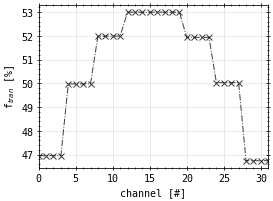

In [14]:
import numpy as np
import matplotlib.pyplot as p
# savefig location
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

f_tran = [  # changed transmission because mesh, other cams parallel
        0.886, 0.886, 0.886, 0.886, 0.943, 0.943, 0.943, 0.943, 0.981,
        0.981, 0.981, 0.981, 1., 1., 1., 1., 1., 1., 1., 1., 0.980,
        0.980, 0.980, 0.980, 0.944, 0.944, 0.944, 0.944, 0.882, 0.882,
        0.882, 0.882]

fig, ax = p.subplots()
fig.set_size_inches(4., 3.)

ax.plot(
    np.array(f_tran) * 53.,
    ls='-.', marker='x',
    c='k', alpha=0.75)
ax.set_xlim(0.0, 31.)

ax.set_xlabel('channel [#]')
ax.set_ylabel('f$_{tran}$ [%]')

fig.savefig(loc + 'ftran_hbcm.pdf', dpi=169.)

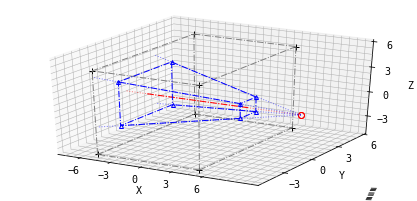

In [2]:
# savelocation
loc = '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/LaTeX/THESIS/content/figures/chapter1/'

import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as p

from scipy.spatial import ConvexHull
from shapely.geometry import LineString, Polygon

import LoS_emissivity3D as L3D

polygon = np.array([
    [-0.5, -0.5, -0.5],
    [-0.5, 0.5, -0.5],
    [0.5, 0.5, -0.5],
    [0.5, -0.5, -0.5],
    [-0.5, -0.5, 0.5],
    [-0.5, 0.5, 0.5],
    [0.5, 0.5, 0.5],
    [0.5, -0.5, 0.5],
]) * 10.
ch = ConvexHull(polygon)

order = [
    [0, 1], [0, 4],
    [1, 2], [1, 5],
    [2, 3], [2, 6],
    [3, 0], [3, 7],
    [4, 5], [5, 6],
    [6, 7], [7, 4]]

fig  = p.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(6., 3.)

ax.plot(
    polygon[:, 0],
    polygon[:, 1],
    polygon[:, 2],
    c='k', marker='+',
    ls='None')

for o in order:
    ax.plot(
        polygon[o, 0],
        polygon[o, 1],
        polygon[o, 2],
        c='grey', ls='-.')

pov = np.array([
    10., 0.0, 0.0])
ax.plot(
    [pov[0], pov[0]],
    [pov[1], pov[1]],
    [pov[2], pov[2]],
    ls='None', marker='o',
    markerfacecolor='None', c='r')

los = np.array([
    [-7., 0.0, 0.0],
    [-7., 3.0, 3.0],
    [-7., 3.0, -3.0],
    [-7., -3.0, -3.0],
    [-7., -3.0, 3.0]
])

ax.plot(
    [pov[0], los[0, 0]],
    [pov[1], los[0, 1]],
    [pov[2], los[0, 2]],
    c='r', ls=':', alpha=0.5)

for L in los[1:]:
    ax.plot(
        [pov[0], L[0]],
        [pov[1], L[1]],
        [pov[2], L[2]],
        c='b', ls=':', alpha=0.5)

hits = np.array([
    [[5., .0, .0], [-5., .0, .0]],
    [[5., 0.8235294, 0.88235294], [-5., 2.64705882, 2.64705882]],
    [[5., 0.8235294, -0.88235294], [-5., 2.64705882, -2.64705882]],
    [[5., -0.8235294, -0.88235294], [-5., -2.64705882, -2.64705882]],
    [[5., -0.8235294, 0.88235294], [-5., -2.64705882, 2.64705882]]
])

ax.plot(
    hits[0][:, 0], hits[0][:, 1], hits[0][:, 2],
    c='r', ls='-.', markersize=4.)

for h in hits[1:]:
    ax.plot(
        h[:, 0], h[:, 1], h[:, 2],
        c='b', ls='-.', marker='^',
        markerfacecolor='None', markersize=4.)

horder = [1, 2, 3, 4, 1]
ax.plot(
    hits[horder, 0, 0],
    hits[horder, 0, 1],
    hits[horder, 0, 2],
    c='b', ls='-.')
ax.plot(
    hits[horder, 1, 0],
    hits[horder, 1, 1],
    hits[horder, 1, 2],
    c='b', ls='-.')

ax.set_xticks([-6, -3, 0, 3, 6])
ax.set_yticks([-3, 0, 3, 6])
ax.set_zticks([-3, 0, 3, 6])

for x in ['x', 'y', 'z']:
    ax.tick_params(axis=x, pad=.2)
ax.set_xlabel('X', labelpad=1.)
ax.set_ylabel('Y', labelpad=1.)
ax.set_zlabel('Z', labelpad=.2)

fig.savefig(loc + 'los_example_polygon.pdf', dpi=169.)

		\\ loaded mesh2D  0.00MB
		\\ load islands1  (4, 15, 100) 0.05MB


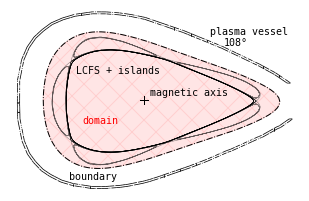

In [27]:
import poincare
import poincare_plots
import matplotlib.pyplot as p
import numpy as np
import os
import mesh_2D
from scipy.spatial import ConvexHull

os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')
r, z = mesh_2D.store_read_mesh2D(
    name='EIM_beta000_sN8_30x20x150_1.3')['values']['fs']['108.']
name = 'phi108.0_res10_conf_lin'
islands = poincare.store_read(
    name=name, arg='islands1_')

fig, ax = p.subplots(1, 1)
poincare_plots.PlotPoincare(
    axis=ax, surfaces=islands, alpha=0.5,
    col='k', style='-', marker='None',
    size=0.25, width=0.5)
poincare_plots.plot_div(axis=ax, phi=108.)

ax.plot(  # LCFS
    r[0], z[0],
    c='k', ls='None',
    marker='+',
    markersize=8.)
ax.plot(  # DOMAIN
    r[-1], z[-1],
    c='k', ls='-.')

poly = np.array([r[-1], z[-1]]).transpose()
hull = ConvexHull(poly)
ax.fill(
    poly[hull.vertices, 0],
    poly[hull.vertices, 1],
    c='r', alpha=0.1, hatch='x')

ax.text(5.7, 0.6, 'plasma vessel', color='k')
ax.text(5.8, 0.5, '108°', color='k')
ax.text(5.25, .05, 'magnetic axis', color='k')
ax.text(4.65, -0.7, 'boundary', color='k')
ax.text(4.75, -0.2, 'domain', c='r')
ax.text(4.7, 0.25, 'LCFS + islands', color='k')

ax.axis('off')
fig.set_size_inches(4.5, 3.)
fig.tight_layout()
fig.savefig('vessel_lcfs_domain.pdf', dpi=169.)

In [5]:
import invert_main as invert
import os
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

(raw_volume, old_volume, volume, line_sections2D,
 line_sections3D, emissivity2D, emissivity3D,
 factors, reff, pos_lofs, minor_radius, reff_LoS,
 camera_geometry, interpolated_geometry, LoS) = invert.main(
        nPhi=30,
        nL=150,
        nFS=20,
        vpF=1.3,
        N=[2, 4],  # 4
        tilt_deg=1.,
        error_scale=0.0001,  # 0.1 mm (0.5 mm)
        VMID='EIM_000',
        interp_method='square',  # triang
        new_type=None,  # 'HBCm'
        cartesian=False,
        add_camera=False,
        artificial_HBCm=False,
        fix_LoS=False,
        centered=False,
        symmetric=False,
        tilt=False,
        random_error=False,
        plot=False,
        debug=False)

	Creating fluxsurface library for EIM_beta000
                FLUXSURFACE: beta-scan with bell-shaped pressure profile ~ (1-s)^2; peaking
                             factor = 3; runs with _l6ns151 have an enlarged volume - cover
                             island region EIM configuration (ref. configuration A: standard,
                             planned OP1.2 configuration). Flux surface geometry of EIM
                             configuration corresponds to the experimental EJM configuration
		Loading from: EIM_beta000_fs_data.json
		Splitting detectors and slit 2x4 times
		>> End result supposed to have 8 squares
	Constructing lines of sight...
		\\ load xy slope  (128, 64) 0.06MB
		\\ load xy constant  (128, 64) 0.06MB
		\\ load xy range  (128, 64, 2) 0.13MB
		\\ load xy line  (128, 64, 2) 0.13MB
		\\ load xz slope  (128, 64) 0.06MB
		\\ load xz constant  (128, 64) 0.06MB
		\\ load xz range  (128, 64, 2) 0.13MB
		\\ load xz line  (128, 64, 2) 0.13MB
		\\ load rz slope  (128, 

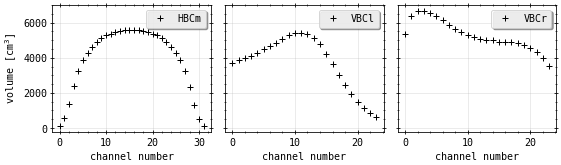

In [45]:
import matplotlib.pyplot as p
import numpy as np
import dat_lists as lists

info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']

fig, ax = p.subplots(1, 3, sharey=True)
ax[0].plot(
    np.sum(volume, axis=(1))[channels['HBCm']] * 100.**3,
    ls='None', marker='+', c='k', label='HBCm')
ax[1].plot(
    np.sum(volume, axis=(1))[channels['VBCl']] * 100.**3,
    ls='None', marker='+', c='k', label='VBCl')
ax[2].plot(
    np.sum(volume, axis=(1))[channels['VBCr']] * 100.**3,
    ls='None', marker='+', c='k', label='VBCr')

ax[0].set_ylabel('volume [cm$^{3}$]')
for x in ax:
    x.set_xlabel('channel number')
    x.legend()

fig.set_size_inches(8., 2.5)
fig.tight_layout()
fig.savefig('volume_per_camera.pdf', dpi=169.)

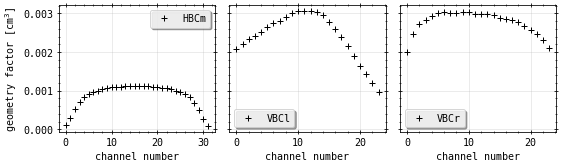

In [43]:
import matplotlib.pyplot as p
import numpy as np
import dat_lists as lists

info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']
emiss = np.sum(emissivity3D, axis=(1, 2, 3))

fig, ax = p.subplots(1, 3, sharey=True)
ax[0].plot(
    emiss[channels['HBCm']] * 100.**3,
    ls='None', marker='+', c='k', label='HBCm')
ax[1].plot(
    emiss[channels['VBCl']] * 100.**3,
    ls='None', marker='+', c='k', label='VBCl')
ax[2].plot(
    emiss[channels['VBCr']] * 100.**3,
    ls='None', marker='+', c='k', label='VBCr')

ax[0].set_ylabel('geometry factor [cm$^{3}$]')
for x in ax:
    x.set_xlabel('channel number')
    x.legend()

fig.set_size_inches(8., 2.5)
fig.tight_layout()
fig.savefig('kfac_per_camera.pdf', dpi=169.)

In [7]:
minor_radius

0.5387891957782814

In [10]:
import matplotlib.pyplot as p
import numpy as np
import dat_lists as lists

info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']
reff_min, reff_emiss = reff_LoS['minimum'] / minor_radius, \
    reff_LoS['emiss'] / minor_radius

fig, ax = p.subplots(1, 3, sharey=True)
ax[0].plot(
    reff_min[channels['HBCm']],
    ls='None', marker='+', c='k', label='min')
ax[0].plot(
    reff_emiss[channels['HBCm']],
    ls='None', marker='x', c='r', label='$T$')

ax[1].plot(
    reff_min[channels['VBCr']],
    ls='None', marker='+', c='k', label='min')
ax[1].plot(
    reff_emiss[channels['VBCr']],
    ls='None', marker='x', c='b', label='$T$')

ax[2].plot(
    reff_min[channels['VBCl']],
    ls='None', marker='+', c='k', label='min')
ax[2].plot(
    reff_emiss[channels['VBCl']],
    ls='None', marker='x', c='g', label='$T$')

ax[0].set_ylabel('effective radius [r/r$_{a}$]')
for x in ax:
    x.set_xlabel('channel number')
    x.legend()

ax[0].text(.0, .0, 'HBC')
ax[1].text(.0, .0, 'VBCr')
ax[2].text(19., .0, 'VBCl')

fig.set_size_inches(8.5, 3.25)
fig.tight_layout()
fig.savefig('reffLoS_minEmiss_normalizedL.pdf', dpi=169.)
p.close('all')

In [7]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as p

import numpy as np
import os
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

import dat_lists as lists
import main as prad_main
import mfr2D_matrix_gridtransform as transf

transf.prepare_geometry_power(
    program='20181010.036',
    label='_EIM_beta000_sN8_30x20x150_1.3',
    strgrid='sN8_30x20x150_1.3',
    debug=False)

data = prad_main.main(
    program='20181010.036',
    date=None,
    shot=None,
    POSIX_from=None,  # in ns
    POSIX_upto=None,  # in ns
    epoch_time=False,
    cont=False,
    filter_method='mean',
    geom_input='self',
    strgrid='sN8_30x20x150_1.3',
    magconf='EIM_beta000',
    plot=False,
    return_pow=False,
    Archive=False,
    compare_archive=False,
    versionize=False,
    ssp=False)

		\\ loaded mesh2D  0.00MB
		\\ load line sections3D  (128, 64, 20, 150) 187.50MB
		\\ load emissivity3D  (128, 64, 20, 150) 187.50MB
		\\ load volume  (128, 64) 0.06MB
		\\ load positions  (129, 20, 150, 4) 11.81MB
		\\ load reff  (129, 64, 20, 150) 188.96MB
		\\ load minor radius

	>> P_rad calculation for output ...
		\\  <class 'TypeError'> webapi_access.py 109 stat  True  -- i --  1
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.3
	>> saving: 20181010.036
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.3_chnpow_HBCm.dat
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.3_chnpow_VBCr.dat
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.3_chnpow_VBCl.dat

>> Start routine for P_rad calculation and diagnostics ...
	>> Selecting date ...
	>> Comparison info for shots ...
	>> Get info from logbook ...
	>> Current date is  20181010 ...
	>>

In [15]:
info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']

fig, ax, cbar_ax = p.figure(), [], []
fig.set_size_inches(3., 4.)


cam, color = 'VBC', 'blue'  # 'VBCr', 'VBCl'
broken = info['channels']['droplist']

ax.append(fig.add_axes([0.1, 1.0, 0.8, 0.4]))
cbar_ax.append(fig.add_axes([0.92, 1.05, 0.025, 0.3]))

CH = []       
ch = channels[cam]
for j, c in enumerate(ch):
    if c in broken:
        continue
    CH.append(c)

norm = mpl.colors.Normalize(
    vmin=0, vmax=len(CH))
c_m = mpl.colors.LinearSegmentedColormap.from_list(
    'mycolors', [color, 'black'])

s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

N, J = 0, 0
ch = channels[cam]
for j, c in enumerate(ch):
    if c in broken:
        continue
            
    ax[0].plot(
        data['radpow']['time'], data['radpow']['power'][c] * 1.e3,
        lw=0.75, alpha=0.75, color=s_m.to_rgba(J))
    J += 1

ax[0].set_ylabel('power [mW]')
fig.colorbar(s_m, cax=cbar_ax[0])
cbar_ax[0].set_ylabel('channel')

ax[0].set_xlim(-0.1, 12.5)
ax[0].set_xlabel('time [s]')

fig.tight_layout()
fig.savefig('power_example_20181010036_' + cam + '.pdf', dpi=169.)
p.close('all')

fig, ax = p.subplots(1, 2, sharey=True)
fig.set_size_inches(7., 2.5)

ax[0].plot(
    data['radpow']['time'], data['radpow']['P_rad_hbc'] / 1.e6,
    lw=1., alpha=1., c='r', label='P$_{rad,HBC}$')
ax[1].plot(
    data['radpow']['time'], data['radpow']['P_rad_vbc'] / 1.e6,
    lw=1., alpha=1., c='b', label='P$_{rad,VBC}$')

ax[0].set_ylabel('power [MW]')
for x in ax:
    x.set_xlim(-0.1, 12.5)
    x.set_xlabel('time [s]')
    x.legend()

fig.tight_layout()
fig.savefig('prad_example_20181010036.pdf', dpi=169.)
p.close('all')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as p
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

import os
import mesh_2D

import invert_main as invert
import os
import mfr2D_accessoires as mfr2D

os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')
r, z = mesh_2D.store_read_mesh2D(
    name='EIM_beta000_sN8_30x20x150_1.3')['values']['fs']['108.']

import poincare
import poincare_plots

name = 'phi108.0_res10_conf_lin'
islands = poincare.store_read(
    name=name, arg='islands1_')

(raw_volume, old_volume, volume, line_sections2D,
 line_sections3D, emissivity2D, emissivity3D,
 factors, reff, pos_lofs, minor_radius, reff_LoS,
 camera_geometry, interpolated_geometry, LoS) = invert.main(
        nPhi=30,
        nL=150,
        nFS=20,
        vpF=1.3,
        N=[2, 4],  # 4
        tilt_deg=1.,
        error_scale=0.0001,  # 0.1 mm (0.5 mm)
        VMID='EIM_000',
        interp_method='square',  # triang
        new_type=None,  # 'HBCm'
        cartesian=False,
        add_camera=False,
        artificial_HBCm=False,
        fix_LoS=False,
        centered=False,
        symmetric=False,
        tilt=False,
        random_error=False,
        plot=False,
        debug=False)

rgrid, zgrid = mfr2D.reform_gridfile(
    program='20181010.032', kani=[1., 3.], nigs=1, grid_nt=150,
    grid_nr=20, debug=False, add_camera=False,
    RGS=False, phantom=False, nVals=[10, 10],
    reduced=True, no_ani=4, strgrid='sN8_30x20x150_1.3')[:2]

		\\ loaded mesh2D  0.00MB
		\\ load islands1  (4, 15, 100) 0.05MB
	Creating fluxsurface library for EIM_beta000
                FLUXSURFACE: beta-scan with bell-shaped pressure profile ~ (1-s)^2; peaking
                             factor = 3; runs with _l6ns151 have an enlarged volume - cover
                             island region EIM configuration (ref. configuration A: standard,
                             planned OP1.2 configuration). Flux surface geometry of EIM
                             configuration corresponds to the experimental EJM configuration
		Loading from: EIM_beta000_fs_data.json
		Splitting detectors and slit 2x4 times
		>> End result supposed to have 8 squares
	Constructing lines of sight...
		\\ load xy slope  (128, 64) 0.06MB
		\\ load xy constant  (128, 64) 0.06MB
		\\ load xy range  (128, 64, 2) 0.13MB
		\\ load xy line  (128, 64, 2) 0.13MB
		\\ load xz slope  (128, 64) 0.06MB
		\\ load xz constant  (128, 64) 0.06MB
		\\ load xz range  (128, 64, 2) 0.13M

In [3]:
emiss = np.sum(emissivity3D, axis=(0, 1))
fig, ax = p.subplots(1, 2, sharey=True)

cs = ['r', 'lightgrey']
for i, x in enumerate(ax):
    poincare_plots.plot_div(axis=x, phi=108.)
    poincare_plots.PlotPoincare(
      axis=x, surfaces=islands, alpha=0.4,
        col=cs[i], style='-', marker='None',
        size=0.25, width=0.4)

patches = []
for i in range(np.shape(rgrid)[0]):
    for j in range(np.shape(zgrid)[1]):
        ax[0].plot(
            rgrid[i, j], zgrid[i, j],
            c='k', ls='-.', lw=0.4, alpha=0.6)
            
        poly = np.array([rgrid[i, j], zgrid[i, j]]).transpose()
        polygon = Polygon(poly, aa=False)
        patches.append(polygon)

plot = PatchCollection(patches, cmap=mpl.cm.viridis)
colors = emiss.reshape(-1) * 1000.**3
plot.set_array(colors)
ax[1].add_collection(plot)

cb = fig.colorbar(plot, ax=ax[1])
cb.set_label('$T$ [mm$^{3}$]')

for cam in ['HBCm', 'VBCl', 'VBCr']:
    ax[0].plot(
        camera_geometry['aperture'][cam]['r'][0],
        camera_geometry['aperture'][cam]['z'][0],
        c='k', marker='x', ls='None')

for j, ch in enumerate([10, 63, 69]):
    lr, lz = LoS['values']['rz_plane']['range'][ch], \
        LoS['values']['rz_plane']['line'][ch]

    xrng = [np.min(lr), np.max(lr)]
    y1rng = [np.min(lz[:, 1]), np.min(lz[:, 0])]
    y2rng = [np.max(lz[:, 1]), np.max(lz[:, 0])]
    x = np.linspace(xrng[0], xrng[1], 100)
    y1 = np.linspace(y1rng[0], y1rng[1], 100)
    y2 = np.linspace(y2rng[0], y2rng[1], 100)

    if j == 0:
        x = x[2:]
        y1 = y1[2:]
        y2 = y2[2:]

    if j == 1:
        x = x[-40:]
        y1 = y1[-40:]
        y2 = y2[-40:]
    if j == 2:
        x = x[:60]  # :-1]
        y1 = y1[::-1][:60]  # :-1] 
        y2 = y2[::-1][:60]  # :-1]

    ax[0].fill_between(
        x, y1, y2,
        alpha=0.5, color='grey')

ax[0].text(4.55, -0.675, 'VBCl/r', color='k')
ax[0].text(6.35, 0.05, 'HBC', color='k')
ax[0].text(4.37, 0.4, '#10', color='grey')
ax[0].text(4.4, -0.4, '#63', color='grey')
ax[0].text(5.15, -0.6, '#69', color='grey')

ax[0].axis('off')
ax[1].axis('off')

fig.set_size_inches(9., 4.)
fig.tight_layout()
fig.savefig('vessel_combinedL_poincare.pdf', dpi=169.)
p.close('all')

In [21]:
import mfr2D_accessoires as mfr2D
import os
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

import matplotlib.pyplot as p
import numpy as np

import mfr2D_matrix_gridtransform as mfr_transf
import dat_lists as lists

info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']
broken = info['channels']['droplist']
kbolo = info['geometry']['kbolo']

cs = ['r', 'b', 'g']
cams = ['HBCm', 'VBCr', 'VBCl']
channels = mfr_transf.mfr_channel_list()

fig, ax = p.subplots(1, 1)  # , sharey=True)

for k, t in enumerate([3.0]):  # , 3.1, 3.2, 3.3, 3.35]):
    (out_2D, r, z, fs_reff, LoS_reff, m_r, M_R,
     tomogram_chordal, xp_chordal, tomogram_radial, peaks_r,
     peaks_hw, peaks_id, half_widths, tomo_total, tomo_core,
     prad_tomogram, prad_xp, xp_error, kani_profile, dphi_profile,
     chi2, tm_hbcm, tm_vbcl, tm_vbcr, tm_artf, label, base,
     nigs_real, mfr_2D) = mfr2D.get_mfr_results(
        program='20180725.044',
        no_ani=3,
        kani=[10.0, 10.0],
        nVals=10,
        nigs=1,
        times=t,
        grid_nt=150,
        grid_nr=20,
        strgrid='sN8_30x20x150_1.4',
        base='_mfr1D',
        magconf='EIM_beta000',
        new_type=None,
        add_camera=False,
        reduced=True,
        phantom=False,
        plot=False,
        saving=False,
        debug=False)
    
    # chordal = xp_chordal[1] / kbolo
    # error = xp_error[1] / kbolo

    #R_min, R_max = +2.0, -2.0
    #for c, cam in enumerate(cams):
    #    CH = channels['reduced']['eChannels'][cam]

    #    R = []
    #    for ch in CH:
    #        R.append(info['radius']['reff'][ch])
    #    R_min = np.min(R) if np.min(R) < R_min else R_min
    #    R_max = np.max(R) if np.max(R) > R_max else R_max

    #    for i, n in enumerate(CH):
    #        if chordal[n] < .0:
    #            CH.remove(n)
    #            R.pop(i)

    #    alphaV = 0.75  # * (k / 3)
    #    ax.errorbar(
    #        [r / m_r for r in R], chordal[CH] / 1.e3,
    #        yerr=(xp_error[CH] / kbolo[CH]) / 1.e3,
    #        ls='-.', marker='.', markersize=5.,
    #        c=cs[c], lw=1., alpha=alphaV,
    #        label=cam.replace('m',''))

#ax.set_xlim(R_min / m_r, R_max / m_r)        
#ax.set_ylabel('brightness [kW/m$^{3}$]')

# for j, axis in enumerate(ax):
#ax.set_xlabel('radius [r/r$_{a}$]')
#for f in [1., -1.]:
    # if j == 2 and f == 1.:
    #    continue
    #ax.axvline(f, c='grey', ls='-.', lw=1.)
#ax.text(1.02, 60., 'LCFS', color='grey')
#ax.text(0.6, 85., '$t=3.0s$', color='k')

#ax.legend()

#ax[0].text(0.8, 100., 'HBC', color='r')
#ax[1].text(0.6, 100., 'VBCr', color='b')
#ax[2].text(-1., 100., 'VBCl', color='g')
#HBC
#ax[0].text(0.02, 100., '3.35s', color='r')
#ax[0].text(0.07, 73., '3.3s', color='r')
#ax[0].text(0.6, 50., '3.2s', color='r')
#ax[0].text(0.7, 15., '3.1s', color='r')
#VBCl
#ax[2].text(-0.85, -10., '3.35s', color='g')
#ax[2].text(-0.75, 20., '3.3s', color='g')
#ax[2].text(-0.8, 80., '3.2s', color='g')
#ax[2].text(-1., 70., '3.1s', color='g')

#fig.set_size_inches(7., 2.75)
#fig.tight_layout()
#fig.savefig('chordal_example.pdf', dpi=169.)
#p.close('all')

//share.ipp-hgw.mpg.de/documents/pih/documents/git/bolometer_mfr/output/20180725.044/sN8_30x20x150_1.4/20180725.044aniM3_10.0_10.0_nT10_reduced_nigs1_sN8_30x20x150_1.4_rgrid_data.dat
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.4
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.4


In [55]:
import matplotlib as mpl
import matplotlib.pyplot as p
import numpy as np

import os
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

import dat_lists as lists
import main as prad_main
import mfr2D_matrix_gridtransform as transf

transf.prepare_geometry_power(
    program='20180725.044',
    label='_EIM_beta000_sN8_30x20x150_1.4',
    strgrid='sN8_30x20x150_1.4',
    debug=False)

data = prad_main.main(
    program='20180725.044',
    date=None,
    shot=None,
    POSIX_from=None,  # in ns
    POSIX_upto=None,  # in ns
    epoch_time=False,
    cont=False,
    filter_method='mean',
    geom_input='self',
    strgrid='sN8_30x20x150_1.4',
    magconf='EIM_beta000',
    plot=False,
    return_pow=False,
    Archive=False,
    compare_archive=False,
    versionize=False,
    ssp=False)

		\\ loaded mesh2D  0.00MB
		\\ load line sections3D  (128, 64, 20, 150) 187.50MB
		\\ load emissivity3D  (128, 64, 20, 150) 187.50MB
		\\ load volume  (128, 64) 0.06MB
		\\ load positions  (129, 20, 150, 4) 11.81MB
		\\ load reff  (129, 64, 20, 150) 188.96MB
		\\ load minor radius

	>> P_rad calculation for output ...
		\\  <class 'TypeError'> webapi_access.py 109 stat  True  -- i --  1
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.4
	>> saving: 20181010.036
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.4_chnpow_HBCm.dat
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.4_chnpow_VBCr.dat
		>> store at: ../../bolometer_mfr/chpow/20181010.036/20181010.036_EIM_beta000_sN8_30x20x150_1.4_chnpow_VBCl.dat

>> Start routine for P_rad calculation and diagnostics ...
	>> Selecting date ...
	>> Comparison info for shots ...
	>> Get info from logbook ...
	>> Current date is  20181010 ...
	>>

In [56]:
info = lists.geom_dat_to_json()
radpow = data['radpow']

broken = info['channels']['droplist']
kbolo = info['geometry']['kbolo']

cs = ['r', 'b', 'g']
cams = ['HBCm', 'VBCr', 'VBCl']

# channels = transf.mfr_channel_list()
channels = info['channels']['eChannels']

fig, ax = p.subplots(1, 3, sharey=True)

for k, t in enumerate([5., 6., 7., 8.]):
    t0 = np.abs(np.array(radpow['time']) - t)
    I = np.where(t0 == np.min(t0))[0][0]

    chordal = np.mean(
        radpow['volscaled'][:, I - 5:I + 5],
        axis=(1))
    # error = radpow['stddiv'] / kbolo
    error = xp_error / kbolo

    for c, cam in enumerate(cams):
        CH = channels[cam]
        for i, n in enumerate(CH):
            if chordal[n] < 250.:
                try:
                    CH.remove(n)
                except Exception:
                    pass 
            if n in broken:
                try:
                    CH.remove(n)
                except Exception:
                    pass

        R_min, R_max = +2.0, -2.0
        R = []
        for ch in CH:
            R.append(info['radius']['reff'][ch])
            # R.append(xp_chordal[0, ch])
        R_min = np.min(R) if np.min(R) < R_min else R_min
        R_max = np.max(R) if np.max(R) > R_max else R_max

        alphaV = 0.75 * (k / 5)
        ax[c].errorbar(
            [r / m_r for r in R], chordal[CH] / 1.e3,
            yerr=error[CH] / 1.e3,
            ls='-.', marker='.', markersize=5.,
            c=cs[c], lw=1., alpha=alphaV,
            label=cam.replace('m',''))
        ax[c].set_xlim(np.min(R) / m_r, np.max(R) / m_r)

ax[0].set_ylabel('brightness [kW/m$^{3}$]')

for j, axis in enumerate(ax):
    axis.set_xlabel('radius [r/r$_{a}$]')
    for f in [1., -1.]:
        if (j == 2 and f == 1.) or (j == 1 and f == -1.):
           continue
        ax[j].axvline(f, c='grey', ls='-.', lw=1.)

#ax.text(1.02, 40., 'LCFS', color='grey')
#ax.text(0.6, 50., '$t=3.0s$', color='k')
#ax.legend()

#ax[0].text(0.8, 100., 'HBC', color='r')
#ax[1].text(0.6, 100., 'VBCr', color='b')
#ax[2].text(-1., 100., 'VBCl', color='g')
#HBC
#ax[0].text(0.02, 100., '3.35s', color='r')
#ax[0].text(0.07, 73., '3.3s', color='r')
#ax[0].text(0.6, 50., '3.2s', color='r')
#ax[0].text(0.7, 15., '3.1s', color='r')
#VBCl
#ax[2].text(-0.85, -10., '3.35s', color='g')
#ax[2].text(-0.75, 20., '3.3s', color='g')
#ax[2].text(-0.8, 80., '3.2s', color='g')
#ax[2].text(-1., 70., '3.1s', color='g')

fig.set_size_inches(7., 2.75)
fig.tight_layout()
fig.savefig('chordal_example3_evolution.pdf', dpi=169.)
p.close('all')

In [36]:
import mfr2D_accessoires as mfr2D
import os
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

import matplotlib as mpl
import matplotlib.pyplot as p
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from matplotlib import gridspec
from matplotlib.pyplot import cm
import numpy as np

import mfr2D_matrix_gridtransform as mfr_transf
import dat_lists as lists

import poincare
import poincare_plots

name = 'phi108.0_res10_conf_lin'
islands = poincare.store_read(
    name=name, arg='islands1_')

info = lists.geom_dat_to_json()
channels = info['channels']['eChannels']
broken = info['channels']['droplist']
kbolo = info['geometry']['kbolo']

cs = ['r', 'b', 'g']
cams = ['HBCm', 'VBCr', 'VBCl']
channels = mfr_transf.mfr_channel_list()

(out_2D, r, z, fs_reff, LoS_reff, m_r, M_R,
 tomogram_chordal, xp_chordal, tomogram_radial, peaks_r,
 peaks_hw, peaks_id, half_widths, tomo_total, tomo_core,
 rad_tomogram, prad_xp, xp_error, kani_profile, dphi_profile,
 chi2, tm_hbcm, tm_vbcl, tm_vbcr, tm_artf, label, base,
 nigs_real, mfr_2D) = mfr2D.get_mfr_results(
    program='20180725.044',
    no_ani=3,
    kani=[10.0, 10.0],
    nVals=10,
    nigs=1,
    times=3.0,
    grid_nt=150,
    grid_nr=20,
    strgrid='sN8_30x20x150_1.4',
    base='_mfr1D',
    magconf='EIM_beta000',
    new_type=None,
    add_camera=False,
    reduced=True,
    phantom=False,
    plot=False,
    saving=False,
    debug=False)

		\\ load islands1  (4, 15, 100) 0.05MB
//share.ipp-hgw.mpg.de/documents/pih/documents/git/bolometer_mfr/output/20180725.044/sN8_30x20x150_1.4/20180725.044aniM3_10.0_10.0_nT10_reduced_nigs1_sN8_30x20x150_1.4_rgrid_data.dat
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.4
		\\ using own geometry input: EIM_beta000 sN8_30x20x150_1.4


In [38]:
fig = p.figure()  # subplots(1, 2)  # , sharey=True)
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3]) 
ax = [p.subplot(gs[0]), p.subplot(gs[1])]

poincare_plots.PlotPoincare(
    axis=ax[1], surfaces=islands, alpha=0.4,
    col='lightgrey', style='-', marker='None',
    size=0.25, width=0.4)

patches = []
for i in range(np.shape(r)[0]):
    for j in range(np.shape(z)[1]):

        poly = np.array([r[i, j], z[i, j]]).transpose()
        polygon = Polygon(poly, aa=False)
        patches.append(polygon)

ax[1].set_xlim(
    np.min(r) - 0.05,
    np.max(r) + 0.05)
ax[1].set_ylim(
    np.min(z) - 0.05,
    np.max(z) + 0.05)

plot = PatchCollection(patches, cmap=mpl.cm.viridis)
colors = out_2D.reshape(-1) * 1.e-3
plot.set_array(colors)
ax[1].add_collection(plot)

cb = fig.colorbar(plot, ax=ax[1])
cb.set_label("""$\^g$ [kW/m$^{3}$]""")
ax[1].set_xlabel('R [m]')
ax[1].set_ylabel('Z [m]')
ax[1].grid(False)

ax[0].fill_between(
    tomogram_radial[0] / m_r,
    (tomogram_radial[1] - np.abs(np.min(mfr_2D)) / 2.)* 1.e-3,
    (tomogram_radial[1] + np.abs(np.min(mfr_2D)) / 2.)* 1.e-3,
    color='r', alpha=.33)
ax[0].errorbar(
    tomogram_radial[0] / m_r,
    tomogram_radial[1] * 1.e-3,
    yerr=np.abs(np.min(mfr_2D)) / 2.e3,
    xerr=((tomogram_radial[0, 1] - tomogram_radial[0, 0]) / m_r) / 2.,
    ecolor='k', elinewidth=0.5, capsize=3,
    fmt='.k', ls='-.', lw=1., alpha=1.)
ax[0].set_xlim(
    np.min(tomogram_radial[0]) / m_r,
    np.max(tomogram_radial[0]) / m_r)
ax[0].set_xlabel('r [r/r$_{a}$]')
ax[0].set_ylabel("""$\^g_{rad}$ [kW/m$^{3}$]""")

fig.set_size_inches(9., 3.)
fig.tight_layout()
fig.savefig('mfr2D_example.pdf', dpi=169.)
p.close('all')

In [7]:
fs_radius = tomogram_radial[0] / m_r

nr, nz = out_2D.shape
zax = out_2D
fig, ax = p.subplots(1, 1)

norm = mpl.colors.Normalize(
    vmin=fs_radius.min(),
    vmax=fs_radius.max())
c_m = mpl.colors.LinearSegmentedColormap.from_list(
    'mycolors', ['b', 'g', 'r'])

s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for r in range(nr):
    l, = ax.plot(
        np.linspace(0, 360., nz),
        zax[r, :] / 1.e3, alpha=0.75,
        color=s_m.to_rgba(fs_radius[r]))

ax.set_xlim(.0, 360.)
ax.set_ylabel("""$\^g_{pol}$ [kW/m$^{3}$]""")
ax.set_xlabel('poloidal angle [°]')

cbar_ax = fig.add_axes([1.0, 0.27, 0.02, 0.63])
fig.colorbar(s_m, cax=cbar_ax)
cbar_ax.set_ylabel('radius [r/r$_{a}$]')

fig.set_size_inches(9., 2.5)
fig.tight_layout()
fig.savefig('mfr2D_poloidal.pdf', dpi=169.)
p.close('all')

In [34]:
fs_radius = tomogram_radial[0] / m_r

nr, nz = out_2D.shape
zax = out_2D
fig, ax = p.subplots(1, 2)

norm = mpl.colors.Normalize(
    vmin=fs_radius.min(),
    vmax=fs_radius.max())
c_m = mpl.colors.LinearSegmentedColormap.from_list(
    'mycolors', ['b', 'g', 'r'])

s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for r in range(nr):
    l, = ax[1].plot(
        np.linspace(0, 360., nz),
        zax[r, :] / 1.e3, alpha=0.75,
        color=s_m.to_rgba(fs_radius[r]))
cbar_ax = fig.add_axes([1.0, 0.27, 0.02, 0.63])
fig.colorbar(s_m, cax=cbar_ax)
cbar_ax.set_ylabel('radius [r/r$_{a}$]')

ax[1].set_xlim(.0, 360.)
ax[1].set_ylabel("""$\^g$ [kW/m$^{3}$]""")
ax[1].set_xlabel('poloidal angle [°]')

ax[0].plot(
    np.linspace(.0, 360., nz),
    np.mean(zax, axis=(0)) / 1.e3,
    c='k', ls='-.', alpha=1., lw=0.75)
ax[0].fill_between(
    np.linspace(.0, 360., nz),
    np.mean(zax, axis=(0)) / 1.e3 - np.abs(np.min(mfr_2D)) / 2.e3,
    np.mean(zax, axis=(0)) / 1.e3 + np.abs(np.min(mfr_2D)) / 2.e3,
    color='r', alpha=.33)
ax[0].errorbar(
    np.linspace(.0, 360., nz)[::20],
    (np.mean(zax, axis=(0)) / 1.e3)[::20],
    yerr=np.abs(np.min(mfr_2D)) / 2.e3,
    xerr=360. / (nz),
    ecolor='k', elinewidth=0.5, capsize=3,
    ls='None', fmt='.k', alpha=1., lw=1.)

ax[0].set_xlim(.0, 360.)
ax[0].set_ylabel("""$\^g_{pol}$ [kW/m$^{3}$]""")
ax[0].set_xlabel('poloidal angle [°]')

fig.set_size_inches(9., 3.25)
fig.tight_layout()
fig.savefig('mfr2D_poloidal.pdf', dpi=169.)
p.close('all')

In [26]:
import os
import importlib
os.chdir('//share.ipp-hgw.mpg.de/documents/pih/Documents/git/QSB_Bolometry/libprad')

import matplotlib as mpl
import matplotlib.pyplot as p

from matplotlib.pyplot import cm
import numpy as np

import mfr2D_matrix_gridtransform as mfr_transf
import dat_lists as lists

import tomogram_metrics as tm
importlib.reload(tm)

# XPID = '20180808.004'
# t4 = 30.
# XPID = '20180807.019'
# t4 = 6.5
# XPID = '20180801.025'
# t4 = 8.5
XPID = '20181010.032'
t4 = 10.5

(aE, aH, aV, aW, adW, aDiv,
 power_balance, tomo_balance) = \
     tm.power_balance_tomogram(
         program=XPID,
         plot=False,
         passVals=False)

(ECRH, HBC, VBC, wdia, dwdia_dt,
 power_load, divs) = \
     tm.power_balance_tomogram(
         program=XPID,
         plot=False,
         passVals=True)

\\ loading tomograms
\\ using own prad
\\ AEF50 not found
\\ divertor updown asym: 0 / 1
\\ loading tomograms
\\ using own prad
\\ AEF50 not found
\\ divertor updown asym: 0 / 1


In [27]:
fig, ax = p.subplots(2, 2, sharex=True, sharey=False)
norm = mpl.colors.Normalize(vmin=0, vmax=4)
c_m = mpl.colors.LinearSegmentedColormap.from_list(
    'mycolors', ['b', 'g'])
s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

f = 1.e-6

ax[0, 0].plot(
    ECRH[0][::100],
    np.convolve(ECRH[1][::100], np.ones((10,)) / 10., mode='same') * f,
    c='k', lw=.75, alpha=.75, label='P$_{ECRH}$')
ax[0, 0].fill_between(
    ECRH[0][::100],
    np.convolve(ECRH[1][::100], np.ones((10,)) / 10., mode='same') * f * 0.9,
    np.convolve(ECRH[1][::100], np.ones((10,)) / 10., mode='same') * f * 1.1,
    color='grey', alpha=.5)

for k, D in enumerate(divs):
    ax[0, 0].plot(
        D[0],
        np.convolve(D[1], np.ones((10,)) / 10., mode='same') * f,
        color='pink', ls='-.', lw=1., alpha=1.)
    #   s_m.to_rgba(k), # label='AEFXX')

stdDiv = np.std(power_load[1][-100:]) * f
ax[0, 0].plot(
    power_load[0],
    np.convolve(power_load[1], np.ones((10,)) / 10., mode='same') * f,
    c='r', lw=0.75, alpha=0.75, label='P$_{div}$')
ax[0, 0].fill_between(
    power_load[0],
    (np.convolve(power_load[1], np.ones((10,)) / 10., mode='same') * f - stdDiv) * 0.92,
    (np.convolve(power_load[1], np.ones((10,)) / 10., mode='same') * f + stdDiv) * 1.08,
    color='r', alpha=0.33)

for L, cam, c in zip(['HBC', 'VBC'], [HBC, VBC], ['r', 'b']):
    stdC = np.std(cam[1][-100:]) * f
    ax[0, 1].plot(
        cam[0], 
        np.convolve(cam[1], np.ones((10,)) / 10., mode='same') * f,
        c=c, lw=0.75, alpha=0.75, label=L)
    ax[0, 1].fill_between(
        cam[0], 
        (np.convolve(cam[1], np.ones((10,)) / 10., mode='same') * f - stdC) * 0.95,
        (np.convolve(cam[1], np.ones((10,)) / 10., mode='same') * f + stdC) * 1.05,
        color=c, alpha=0.33)

stdDia = np.std(wdia[1][-100:]) * 1.e-3
stddWdia = stdDia / (wdia[1][1] - wdia[1][0]) * 1.e-3
err_dWdia = np.std(dwdia_dt[1][-100:]) * f

axisDia = ax[1, 0].twinx()
N = 20
WdiaL, = axisDia.plot(
    wdia[0][::1000],
    np.convolve(wdia[1][::1000], np.ones((N,)) / N, mode='same') * 1.e-3,
    c='r', ls='-.', alpha=0.75, lw=0.75, label='W$_{dia}$')
axisDia.fill_between(
    wdia[0][::1000],
    np.convolve(wdia[1][::1000], np.ones((N,)) / N, mode='same') * 1.e-3 - stdDia,
    np.convolve(wdia[1][::1000], np.ones((N,)) / N, mode='same') * 1.e-3 + stdDia,
    color='r', alpha=0.33)

dWdiaL, = ax[1, 0].plot(
   dwdia_dt[0][::1000],
   np.convolve(dwdia_dt[1][::1000], np.ones((N,)) / N, mode='same') * f,
   c='k', lw=0.75, alpha=0.75, label='dW$_{dia}/dt$')
ax[1, 0].fill_between(
   dwdia_dt[0][::1000],
   np.convolve(dwdia_dt[1][::1000], np.ones((N,)) / N, mode='same') * f - err_dWdia,
   np.convolve(dwdia_dt[1][::1000], np.ones((N,)) / N, mode='same') * f + err_dWdia,
   color='grey', alpha=0.5)

lines = []
for L, pbal, c in zip(
        ['P$_{b, HBC}$', 'P$_{b, VBC}$'],
        [power_balance[1], power_balance[2], power_balance[3]],
        ['r',  'b', 'k']):
    l, = ax[1, 1].plot(
        power_balance[0][::1000],
        np.convolve(pbal[::1000], np.ones((5,)) / 5., mode='same') * f,
        c=c, lw=0.75, alpha=0.75, label=L)
    lines.append(l)

totP = aE[1] * 1.1 - aDiv[1] * 0.92 - \
    (aH[1] + aV[1]) / 2. * 0.95 - (adW[1] + err_dWdia)
totM = aE[1] * 0.9 - aDiv[1] * 1.08 - \
    (aH[1] + aV[1]) / 2. * 1.05 - (adW[1] - err_dWdia)

ax[1, 1].fill_between(
    aE[0][::1000],
    totP[::1000] * f,
    totM[::1000] * f,
    color='grey', alpha=0.5)

ax[1, 1].set_xlabel('time [s]')
ax[1, 0].set_xlabel('time [s]')

ax[0, 0].set_ylabel('power [MW]')
ax[0, 1].set_ylabel('P$_{rad}$ [MW]')
ax[1, 0].set_ylabel('power [MW]')
axisDia.set_ylabel('energy [kJ]')
ax[1, 1].set_ylabel('balance [MW]')

align_yaxis(
    ax[1, 0], .0, axisDia, .0,
    np.min(wdia[1][::1000]) / 1.e3,
    np.max(wdia[1][::1000]) / 1.e3)

ax[0, 0].legend(
    ncol=2, fancybox=True, shadow=False)
ax[0, 1].legend(ncol=2, fancybox=True, shadow=False)
ax[1, 0].legend(
    [WdiaL, dWdiaL],
    [l.get_label() for l in [WdiaL, dWdiaL]],
    ncol=2, fancybox=True, shadow=False)
ax[1, 1].legend(
    [lines[0], lines[1]],
    [l.get_label() for l in [lines[0], lines[1]]],
    ncol=2, fancybox=True, shadow=False)
ax[0, 0].set_xlim(-.5, t4)

fig.set_size_inches(10., 5.)
fig.tight_layout()
fig.savefig('power_balance_example_' + XPID + '.pdf', dpi=169.)
p.close('all')

In [7]:
import magic_function as mf
(D, error, power, dpower) = mf.gaussian_error_propagation()

>> At U_d= 4.000e-04 V the power P= 9.599e-05 W ; s= 1.599e-06 W  dpower= -1.787e-08 W
